2026-01-02 22:32:36.405 | INFO     | src.data.loader:load_all_sources:40 - 📦 Loading data from all sources...
2026-01-02 22:32:36.436 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 144 items from tunisianet_latest.json
2026-01-02 22:32:36.495 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 1214 items from mytek_latest.json
2026-01-02 22:32:36.538 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 601 items from ldlc_latest.json
2026-01-02 22:32:36.560 | SUCCESS  | src.data.loader:load_all_sources:59 - ✅ Loaded 1959 total products from 1959 sources
2026-01-02 22:32:36.585 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 144 items from tunisianet_latest.json
2026-01-02 22:32:36.702 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 1214 items from mytek_latest.json
2026-01-02 22:32:36.718 | INFO     | src.data.loader:load_json:30 - ✓ Loaded 601 items from ldlc_latest.json


📊 Total products: 1959
📋 Columns: ['id', 'title', 'price', 'currency', 'regular_price', 'discount_percent', 'brand', 'url', 'image', 'in_stock', 'source', 'country', 'scraped_at', 'processor', 'gpu', 'ram_gb', 'storage', 'screen_size', 'sku', 'description']

📊 DATA SUMMARY
total_products: 1959
sources: {'mytek': 1214, 'ldlc': 601, 'tunisianet': 144}
countries: {'Tunisia': 1358, 'France': 601}
currencies: {'TND': 1358, 'EUR': 601}
missing_prices: 841
missing_titles: 0
date_range: {'min': '2026-01-02T16:13:28.689531', 'max': '2026-01-02T16:47:56.427241'}

📦 DATA BY SOURCE
tunisianet: 144 products
mytek: 1214 products
ldlc: 601 products

💰 PRICE STATISTICS

TUNISIANET:
count     144.000000
mean     2577.875000
std       263.854242
min      2025.000000
25%      2389.000000
50%      2584.000000
75%      2774.000000
max      3059.000000
Name: price, dtype: float64

MYTEK:
count    373.000000
mean     403.733780
std      292.972477
min        1.500000
25%      149.000000
50%      359.000000
7

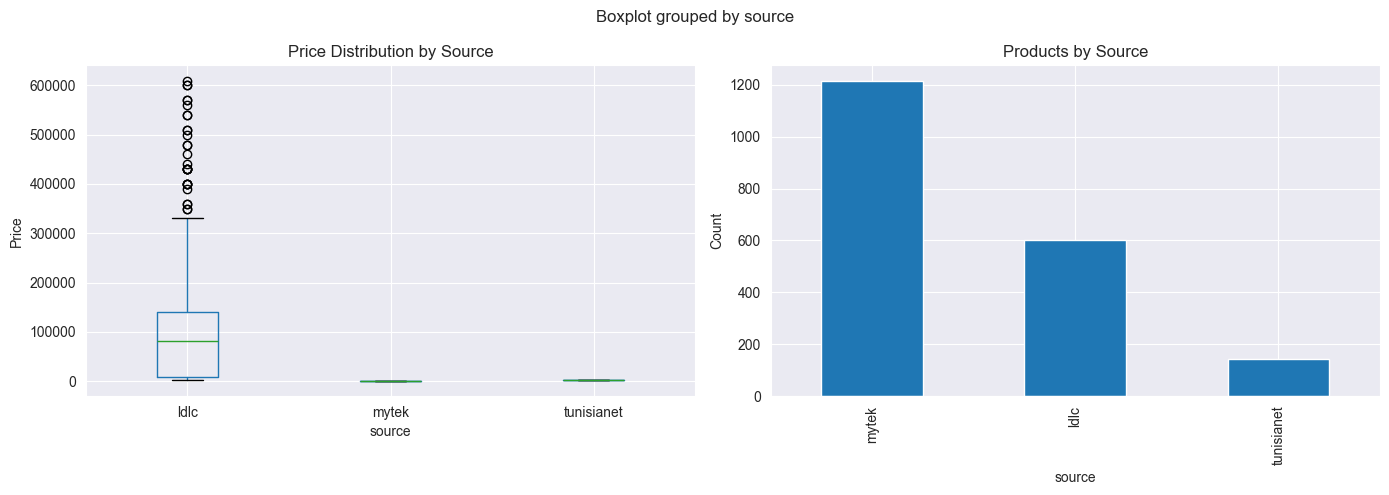


🔍 MISSING DATA
                  Missing Count  Missing %
regular_price              1867  95.303726
screen_size                1852  94.538030
processor                  1716  87.595712
gpu                        1405  71.720265
ram_gb                     1150  58.703420
storage                    1137  58.039816
price                       841  42.930066
sku                         745  38.029607
description                 745  38.029607
discount_percent            601  30.678918
brand                       404  20.622767
image                       144   7.350689

💱 CURRENCY DISTRIBUTION
country  currency
France   EUR          601
Tunisia  TND         1358
dtype: int64

✅ Saved initial data to data/processed/00_initial_data.csv


In [1]:
"""
01 - Data Loading and Initial Exploration
"""

# %%
# Imports
import sys
sys.path.append('..')

from src.data.loader import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

# Configure pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

# %%
# Load data
loader = DataLoader(data_dir='../data/raw')

# Load all data combined
df_all = loader.load_all_sources()

print(f"📊 Total products: {len(df_all)}")
print(f"📋 Columns: {list(df_all.columns)}")

# %%
# Display first rows
df_all.head(10)

# %%
# Get summary
summary = loader.get_summary(df_all)

print("\n📊 DATA SUMMARY")
print("="*50)
for key, value in summary.items():
    print(f"{key}: {value}")

# %%
# Load by source
sources = loader.load_by_source()

print("\n📦 DATA BY SOURCE")
print("="*50)
for source_name, df_source in sources.items():
    print(f"{source_name}: {len(df_source)} products")

# %%
# Basic statistics
print("\n💰 PRICE STATISTICS")
print("="*50)

for source_name, df_source in sources.items():
    print(f"\n{source_name.upper()}:")
    print(df_source['price'].describe())

# %%
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price distribution by source
df_all.boxplot(column='price', by='source', ax=axes[0])
axes[0].set_title('Price Distribution by Source')
axes[0].set_ylabel('Price')

# Product count by source
df_all['source'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Products by Source')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# %%
# Missing data analysis
print("\n🔍 MISSING DATA")
print("="*50)
missing = df_all.isnull().sum()
missing_pct = (missing / len(df_all)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# %%
# Currency distribution
print("\n💱 CURRENCY DISTRIBUTION")
print("="*50)
print(df_all.groupby(['country', 'currency']).size())

# %%
# Save initial stats for later
df_all.to_csv('../data/processed/00_initial_data.csv', index=False)
print("\n✅ Saved initial data to data/processed/00_initial_data.csv")